## Task 1: Users to Movies


The following example is from from http://web.stanford.edu/class/cs246/slides/06-dim_red.pdf

Consider the following data matrix, $X$, 

<img src="img.png" height="300" width="300" align='center'>

- Here, each row corresponds to the ratings submitted by a single user on a scale of $1$ to $5$ for each of the movies. If a user hasn't submitted a movie rating, then rating is then marked by a zero. 
- By a visual inspection, we see that the movies are either **sci-fi** or **romance**
- The individual movies that we start with can be considered 5 different dimensions, whereas when we group them into two genres (sci-fi or romance), these may be seen as a compressed representation of our data.
- So the natural question is, can we it possible to gain compressed representation of our data matrix to highlight this distinction in our data?

In [18]:
# Import necessary libs:

# 1. import plt from matplotlib
# 2. import Axes3D from mpl_toolkits.mplot3d
# 3. import proj3d from mpl_toolkits.mplot3d
# 4. import FancyArrowPatch from matplotlib.patches

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
import numpy as np

In [19]:
# Create the dataset using the np.array() with the data provided above
X = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])
# Store the number of users for further usages.
nUsers = X.shape[0]

# Store the number of movies for further usages.
nMovies = X.shape[1]


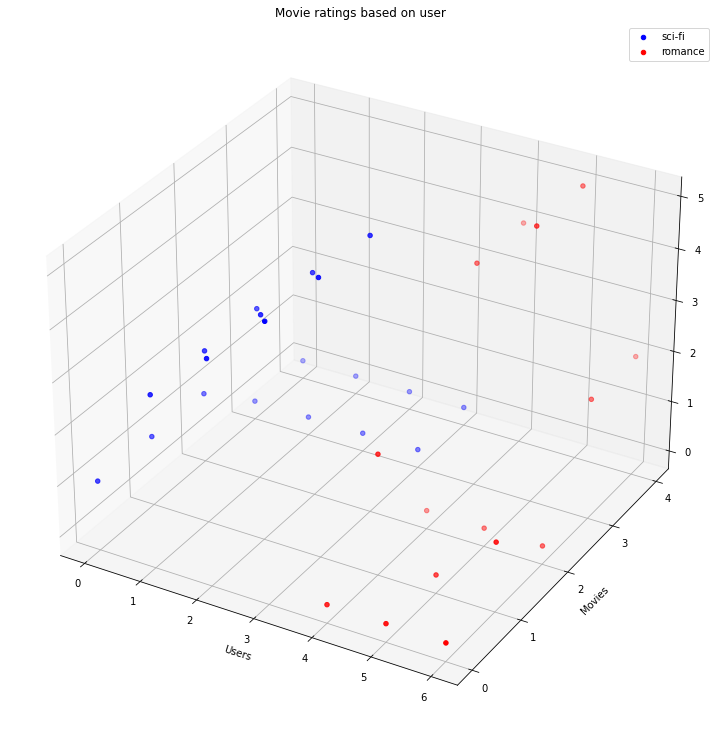

In [20]:
# Plot the data set:

# 1. Create three arrays: users, movie, and reviews. to represent the data matrix
#     that is users[0], movie[0] and reviews[0] represent the review of the first user on the first movie.
# tips: use np.array() and flatten() function.
users=[]
for j in range(nUsers):
    for i in range (nMovies):
        users.append(j)
users = np.array(users)

movies=[]
for j in range(nUsers):
    for i in range (nMovies):
        movies.append(i)
movies = np.array(movies)

reviews = X.flatten()

# 2. Set the figure size to (13,13) by using the function plt.figure().
fig = plt.figure(figsize=(13,13))

# 3. Add the subplot that point the 1*1 grid by using the function add_subplot() on the figure object.
#     set the first positional arguments to 111 and projection to 3d.
subPlot = fig.add_subplot(1, 1, 1, projection='3d')

# 4. Set the font size of the legend to be 10 by using plt.rcParams with 'legend.fontsize' as the key.
plt.rcParams.update({'legend.fontsize':10})

# 5. Plot the dataset using plot() for the Sci-fi movie and set x to be the user list, y to be the movie list and z to be the reviews
#     moreover, set resonalbe color and label legend.
subPlot.scatter(users[:20], movies[:20], reviews[:20], color='b', label='sci-fi')

# 6. Plot the dataset using plot() for the Romance follow the pervious instruction.
subPlot.scatter(users[20:], movies[20:], reviews[20:], color='r', label='romance')

# 7. Set the legend to a proper position using ax.legend(loc=?)
subPlot.legend(loc='upper right')

# 8. Set label for the x and y axis with proper front size using plt.xlabel(...)
plt.xlabel('Users')
plt.ylabel('Movies')

# 9. Set the title of this fig using plt.title()
plt.title("Movie ratings based on user")

# 10. Set the ticks for x axis and y aixs by using plt.xticks()/yticks()
plt.xticks(range(nUsers))
plt.yticks(range(nMovies))

# 11. plot and present the fig using plt.show()
plt.show()


In [21]:
# Data Preprocessing:

# 1. Calculate the mean of the data set
mean = np.mean(X)

# 2. Subtract the mean from the data set
# 3. Store the new centered data set
center = X - mean

## Solution1: Implementing PCA using Singular Value Decomposition (SVD)

We start with the simplest and most straightforward strategy first - **Singular Value Decomposition**. <br>

From our Matrix theory, we know that ever matrix out there can we decomposed into a multiplication of 3 matrices (image is from Tim Roughgarden):

$$ X = U S  V^T$$

In class we proved that we can use the SVD to factorize $X^TX=(USV^T)^T(USV^T)=VS^2V^T$.

The principal components of the matrix $A=X^TX$, lie in the rows of matrix $V^T$. Therefore, by selecting the first $k$ columns of $V$, we end up selecting $v_1, v_2, ..., v_k$ vectors.

In [22]:
# Calculate the U, S, V^T:
# 1. Use the singular value decomposition from numpy.
# 2. np.linalg.svd()
# 3. Store the u,s,v^T values
U, S, VT = np.linalg.svd(center)

In [23]:
print("U.shape, S.shape, V.T.shape ->", U.shape, S.shape, VT.shape, end="\n\n")

print("U =",np.around(U, decimals=3), sep="\n", end="\n\n")

print("S =",np.around(S, decimals=3), sep="\n", end="\n\n")

print("V.T =",np.around(VT, decimals=3), sep="\n", end="\n\n")

U.shape, S.shape, V.T.shape -> (7, 7) (5,) (5, 5)

U =
[[ 0.055 -0.707 -0.082 -0.658 -0.136  0.124 -0.152]
 [ 0.305 -0.157 -0.146  0.431  0.049  0.709 -0.414]
 [ 0.429  0.118 -0.178 -0.279  0.736  0.136  0.364]
 [ 0.554  0.393 -0.21  -0.241 -0.631  0.096  0.172]
 [-0.344  0.263 -0.807 -0.162  0.087 -0.072 -0.349]
 [-0.503  0.328  0.247 -0.337 -0.04   0.655  0.184]
 [-0.206 -0.36  -0.428  0.325 -0.175  0.143  0.699]]

S =
[10.555  4.094  1.673  0.     0.   ]

V.T =
[[ 0.466  0.382  0.466 -0.458 -0.458]
 [ 0.362  0.402  0.362  0.537  0.537]
 [ 0.389 -0.832  0.389  0.05   0.05 ]
 [-0.707 -0.     0.707 -0.    -0.   ]
 [ 0.     0.    -0.    -0.707  0.707]]



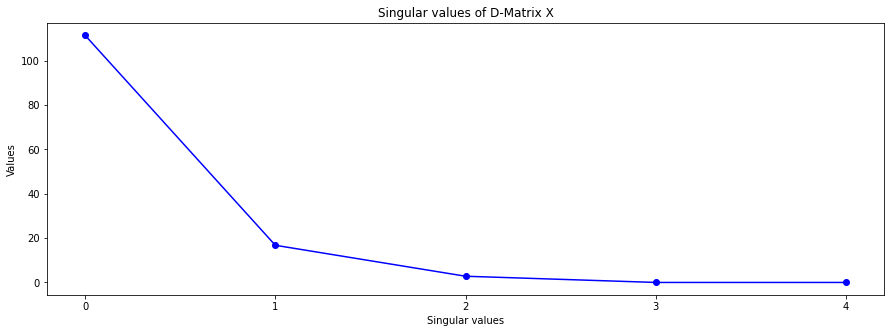

In [24]:
# plot the singlar values for the  D  matrix.
# 1. Calculate the D matrix using s: D is s*s
D = S*S

# 2. Set the fig size to (15,5)
fig = plt.figure(figsize=(15,5))

# 3. Add the line chart using plt.plot( ?? ,'bo-')
plt.plot(D, 'bo-')

# 3. Add proper tital, ticks, axis labels
plt.xlabel('Singular values')
plt.ylabel('Values')

plt.title("Singular values of D-Matrix X")

plt.xticks(range(len(D)))

plt.show()


In [25]:
# Obtaining our compressed data representation:
# 1. Determine at least k singular values are needed to represent the data set from the fig above
# 2. Obtain the first k of v^T and store it
VTk = VT[:len(D)].T

# 3. Calculate the compressed data using np.matmul(), X and stored first k of v^T
comp = np.matmul(center,VTk)

# 4. Print the compressed value of X
print(comp)

[[ 5.84633697e-01 -2.89594021e+00 -1.36647418e-01  4.33709963e-16
  -3.14897562e-16]
 [ 3.21411556e+00 -6.43332148e-01 -2.44267385e-01 -2.32423851e-16
  -9.28529569e-17]
 [ 4.52885649e+00  4.82971883e-01 -2.98077369e-01 -5.19503815e-16
  -9.28529569e-17]
 [ 5.84359742e+00  1.60927591e+00 -3.51887353e-01 -1.18563763e-15
   1.29191648e-16]
 [-3.62839239e+00  1.07609836e+00 -1.35045169e+00  2.11665358e-16
   2.86200894e-16]
 [-5.30742492e+00  1.34455970e+00  4.12721094e-01  3.78198812e-16
   3.97223196e-16]
 [-2.17924981e+00 -1.47307294e+00 -7.16644562e-01  3.22687661e-16
  -2.34640178e-17]]


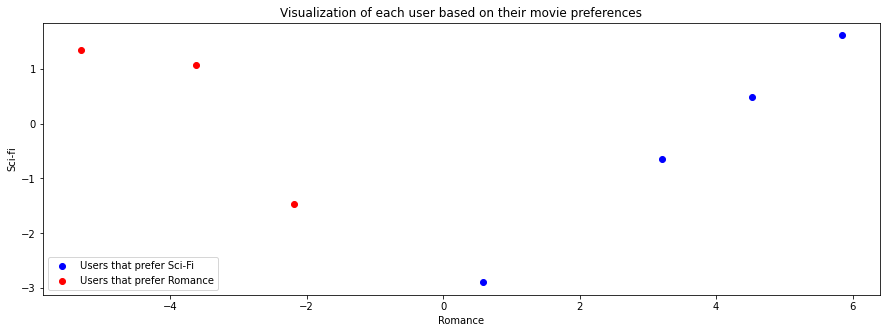

In [26]:
# Visualize what just happened:
# 1. Set the fig size to (15,5)
plt.figure(figsize=(15, 5))


# 2. Plot the data
plt.scatter(comp[:4,0], comp[:4,1], color='b', label='Users that prefer Sci-Fi') #first  4 are for the users that prefer sci-fi movies, the rest are romance
plt.scatter(comp[4:,0], comp[4:,1], color='r', label='Users that prefer Romance')

# 3. Create propor title, axis and legend
plt.xlabel('Romance')
plt.ylabel('Sci-fi')

plt.title('Visualization of each user based on their movie preferences')

plt.legend(loc="lower left")

plt.show()

## Solution2: Directly computing  V and D 

Now we compute $V$ (aka as the eigenvectors), and the diagonal elements of $D$ (aka eigenvalues) from $A=X^TX=V D V^T$

The covariance matrix data matrix, $X$, can be computed as  $\frac{1}{N}X^TX$. <br>
If $X$ is our data matrix comprising of $d$ features. Then $X^TX$ is a $(d \times d)$ symmetrix matrix wherein each entry at location **ij** corresponds to the scalar projection of **feature i** with **feature j**.

In [27]:
# Alternative implementation：
# Directly computing V and D from X and X^T
# 1. Comput XTX using np.matmul() and store it.
XTX = np.matmul(center.T, center)

# 2. Apply np.linalg.eig() to clculate the eigen vectors and values
values, vectors = np.linalg.eig(XTX)


In [28]:
print("V (Eigen-vectors) = ")
print(np.around(vectors, decimals=3))
print()
print("diagonal elements of D (Eigen-values) = ")
print(np.around(values, decimals=3)) 
print()
print("sqrt(Eigen-values) = ")
print(np.around(np.sqrt(np.abs(values)), decimals=3))

V (Eigen-vectors) = 
[[-0.466 -0.362  0.389 -0.706 -0.047]
 [-0.382 -0.402 -0.832 -0.    -0.   ]
 [-0.466 -0.362  0.389  0.706  0.047]
 [ 0.458 -0.537  0.05   0.033 -0.706]
 [ 0.458 -0.537  0.05  -0.033  0.706]]

diagonal elements of D (Eigen-values) = 
[111.414  16.759   2.799   0.     -0.   ]

sqrt(Eigen-values) = 
[10.555  4.094  1.673  0.     0.   ]


Notice the following:
1. That the **square-root of the eigen-values** of the covariance matrix $X^TX$ correspond exactly the the **singular values** of the data matrix $X$.
2. The **eigen-vectors** of $X^TX$ are exactly the same as the column vectors in the matrix $V$ when we performed SVD on $X$.

Therefore, the same Princpal components of our data matrix $X$, may be extracted via SVD or from $X$'s convariance matrix.

## Task 2: Human Faces 

Each image is a 62x47 pixel array. The images are read into a matrix called fea. Each row of the matrix fea represents one image (example). The features (columns) are the pixel values. Each example is represented by a vector of real numbers of length 2914, listing the pixels from left to right, row by row, from top to bottom.

In [2]:
# Import libs:
# 1. numpy
# 2. matplotlib and plt
# 3. pandas
# 4. fetch_lfw_people from sklearn.datasets

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_lfw_people

In [19]:
# Data set:
# 1. Load the dataset using fetch_lfw_people() with min_faces_per_person setted to be 70
#     detail of min_faces_per_person please refer to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html
people = fetch_lfw_people(min_faces_per_person = 70)

# 2. Store the number of images and its hight, width using lfw_people.images.shape
images, h, w = people.images.shape

# 3. Calculate number of pixels
nPixels = h*w

# 4. Store the pixel values using lfw_people.data
pVals = people.data
print(len(pVals))

1288


In [13]:
def plt_face(x):
    global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])

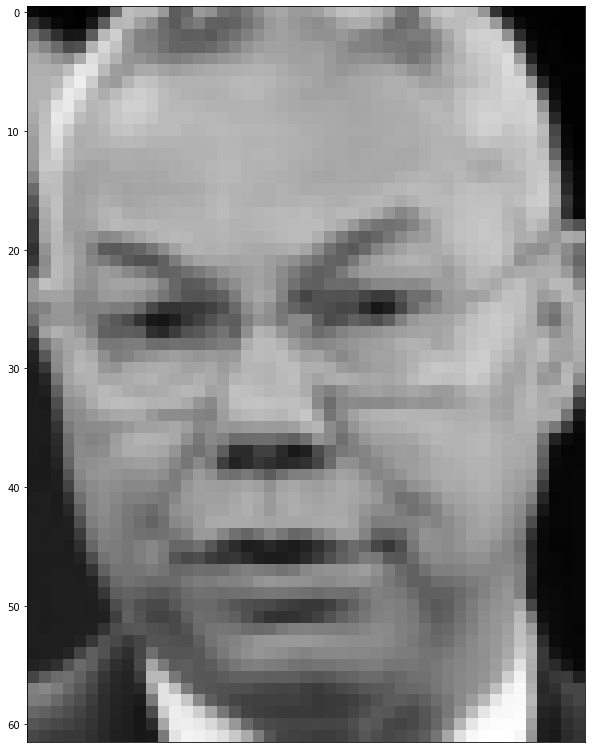

In [25]:
# Use the function we provided above, plot some faces:
# 1. Define the fig size to (10,20)
fig = plt.figure(figsize=(10,20))

# 2. Use plt_face()
# 3. plt.show()
for i in range(4):
    plt_face(pVals[i])
plt.show()




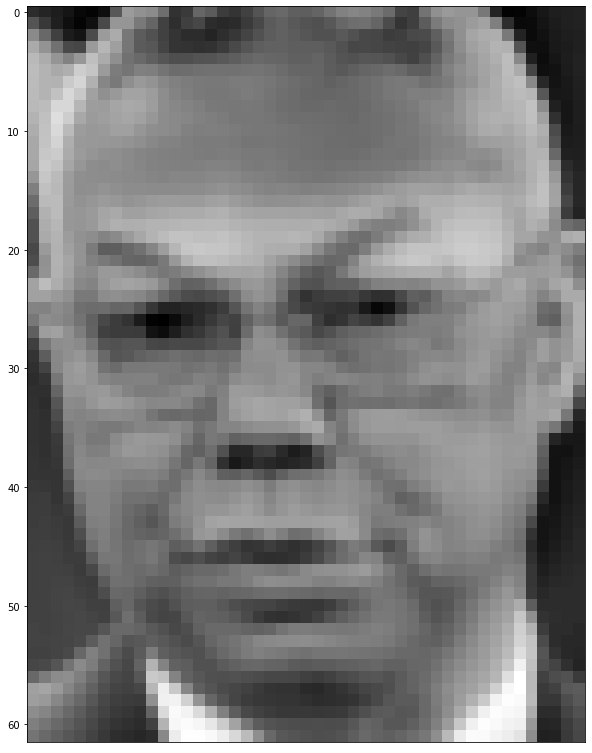

In [48]:
# Find the Mean picture:
# 1. Calculate the mean of the image data
pMean = np.mean(pVals, axis=0)

# 2. Remove the mean from all the image
pCenter = pVals - pMean

# 3. plot the face use plt_face()

fig = plt.figure(figsize=(10,20))

for i in range(4):
    plt_face(pCenter[i])
plt.show()

In [49]:
# Find eig vec and eig value:
# 1. Calculate the covariance metric of the zero_mean data
cov = np.matmul(pCenter.T, pCenter)

# 2. Use the np.linalg.eig() to compute eig value and eig vectors
pValues, pVectors = np.linalg.eig(cov)

# 3. Find the top5 features
# 4. Calculate the new value based on the top5 feature.
# 5. Store the new value.
pValues = pValues[:5]
pVectors = pVectors[:5].T
top5 = [0,1,2,3,4]


In [50]:
print("Top 5 Vector:")
print()
print(pVectors.real.tolist())
print()
print("Top 5 EigVal:")
print()
print(pValues.real)
print()
print("Associateed 5 attributes in fourth image")
print("Indexing by",top5)
print()
print(pCenter[3][top5])

Top 5 Vector:

[[0.005373429507017136, 0.005695135332643986, 0.0061380332335829735, 0.007016506511718035, 0.007956034503877163], [0.017459914088249207, 0.016475625336170197, 0.016284329816699028, 0.018298977985978127, 0.02073809690773487], [0.017839690670371056, 0.016025438904762268, 0.014887979254126549, 0.014003134332597256, 0.01348405983299017], [0.033519238233566284, 0.035288382321596146, 0.03671131283044815, 0.03776909410953522, 0.03860314562916756], [-0.013145295903086662, -0.013579614460468292, -0.014037939719855785, -0.014300554059445858, -0.013201900757849216], [-0.005930399522185326, -0.010307753458619118, -0.015309826470911503, -0.017578722909092903, -0.015379882417619228], [-0.020768094807863235, -0.023044878616929054, -0.025602029636502266, -0.023677164688706398, -0.016221672296524048], [-0.00959715060889721, -0.01006258837878704, -0.00742967939004302, 0.00026049805455841124, 0.006132333539426327], [-0.041845034807920456, -0.04166416451334953, -0.03962577506899834, -0.0349

In [51]:
print("Top 5 EigVal:")
print()
print(pValues.real)

Top 5 EigVal:

[9.8932755e+08 7.9189363e+08 3.8294509e+08 3.1824362e+08 2.7124672e+08]


In [52]:
# projection of fourth face to first 5 principle components
# project back to the image space where d=5
# X’= X_pca * VT  + X_mean
X_pca = np.matmul(pCenter[3], pVectors)

proj = np.matmul(X_pca, pVectors.T) + pMean

print(proj)

[ 91.01017   92.606155  99.11938  ... 116.74757  110.62371  104.303986]


The projection of fourth image


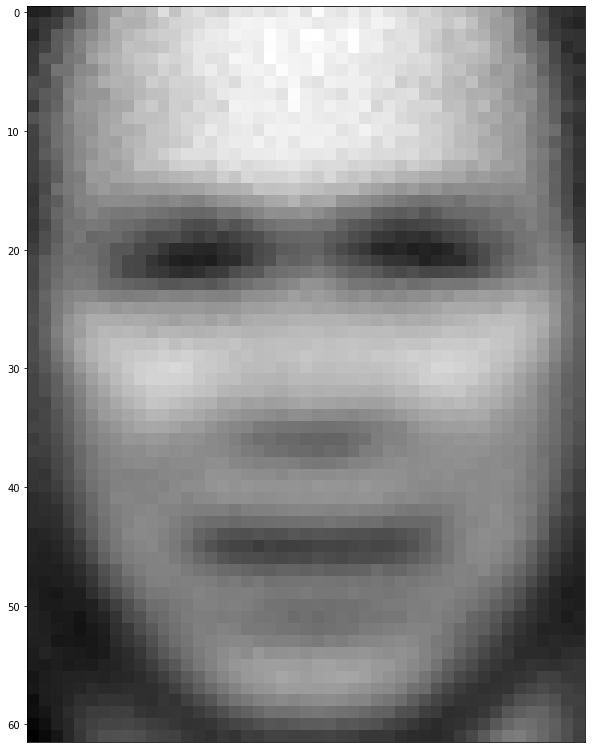

In [53]:
print("The projection of fourth image")

fig = plt.figure(figsize=(10,20))
plt_face(proj)

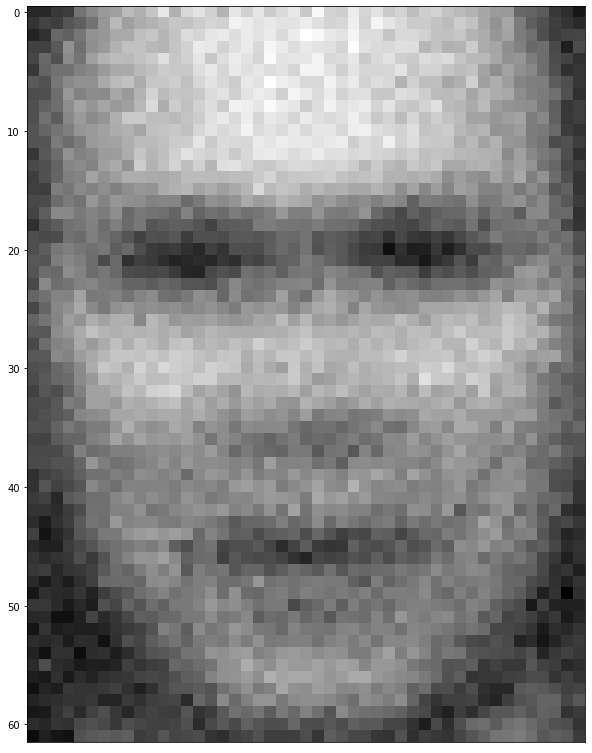

In [56]:
# project back to images where d=50
# 1. Find top 50 eig vec and eig val
# 2. Store the top 50 eig vec
# 3. Store the top 50 eig val
# 4. compute the newfeature using top50 eig vec and eig val.
# 5. plot the feace
pValues, pVectors = np.linalg.eig(cov)

pValues = pValues[:50]
pVectors = pVectors[:50].T

X_pca = np.matmul(pCenter[3], pVectors)

proj = np.matmul(X_pca, pVectors.T) + pMean

figure = plt.figure(figsize=(10,20))
plt_face(proj)